#          DBSCAN
# 1. Khai báo và import

In [2]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
import matplotlib.patheffects as PathEffects
import seaborn as sns
import numpy as np
# importing required libraries for normalizing data
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import LabelBinarizer

In [3]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.layers import Dense, MaxPool1D, Flatten, Dropout,Conv1D , BatchNormalization
from keras.models import Sequential # importing dense layer
from keras.models import Sequential #importing Sequential layer
from keras.layers import Input
from keras.models import Model
# representation of model layers
from keras.utils.vis_utils import plot_model

2023-05-08 19:20:27.927545: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-08 19:20:28.407278: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-08 19:20:28.410179: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-08 19:20:30.101034: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [4]:
feature=["duration","protocol_type","service","flag","src_bytes","dst_bytes","land","wrong_fragment","urgent","hot",
          "num_failed_logins","logged_in","num_compromised","root_shell","su_attempted","num_root","num_file_creations","num_shells",
          "num_access_files","num_outbound_cmds","is_host_login","is_guest_login","count","srv_count","serror_rate","srv_serror_rate",
          "rerror_rate","srv_rerror_rate","same_srv_rate","diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count", 
          "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate","dst_host_srv_diff_host_rate","dst_host_serror_rate",
          "dst_host_srv_serror_rate","dst_host_rerror_rate","dst_host_srv_rerror_rate","label","difficulty"]

In [5]:
train='./KDDTrain+.txt'
test='./KDDTest+.txt'
data=pd.read_csv(train,names=feature)
test_data=pd.read_csv(test,names=feature)

In [6]:
test_data.shape

(22544, 43)

In [7]:
data.shape

(125973, 43)

In [8]:
# phân loại lớp 
def change_label(df):
  df.label.replace(['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','udpstorm','worm'],'Dos',inplace=True)
  df.label.replace(['ftp_write','guess_passwd','httptunnel','imap','multihop','named','phf','sendmail','snmpgetattack','snmpguess','spy','warezclient','warezmaster','xlock','xsnoop'],'R2L',inplace=True)      
  df.label.replace(['ipsweep','mscan','nmap','portsweep','saint','satan'],'Probe',inplace=True)
  df.label.replace(['buffer_overflow','loadmodule','perl','ps','rootkit','sqlattack','xterm'],'U2R',inplace=True)

change_label(data)
change_label(test_data)

In [9]:
# xóa 'difficulty_level'
data.drop(['difficulty'],axis=1,inplace=True)
test_data.drop(['difficulty'],axis=1,inplace=True)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

# 2. Exploring

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

In [12]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,125973.0,287.144650,2.604515e+03,0.0,0.00,0.00,0.00,4.290800e+04
src_bytes,125973.0,45566.743000,5.870331e+06,0.0,0.00,44.00,276.00,1.379964e+09
dst_bytes,125973.0,19779.114421,4.021269e+06,0.0,0.00,0.00,516.00,1.309937e+09
land,125973.0,0.000198,1.408607e-02,0.0,0.00,0.00,0.00,1.000000e+00
wrong_fragment,125973.0,0.022687,2.535300e-01,0.0,0.00,0.00,0.00,3.000000e+00
urgent,125973.0,0.000111,1.436603e-02,0.0,0.00,0.00,0.00,3.000000e+00
hot,125973.0,0.204409,2.149968e+00,0.0,0.00,0.00,0.00,7.700000e+01
num_failed_logins,125973.0,0.001222,4.523914e-02,0.0,0.00,0.00,0.00,5.000000e+00
logged_in,125973.0,0.395736,4.890101e-01,0.0,0.00,0.00,1.00,1.000000e+00
num_compromised,125973.0,0.279250,2.394204e+01,0.0,0.00,0.00,0.00,7.479000e+03


# 3. Chuẩn hóa

In [13]:
# tạo datafreame labels (Dos,Probe,R2L,U2R,normal)
label = pd.DataFrame(data.label)
label1 = pd.DataFrame(test_data.label)

In [14]:
minmax_scaler = MinMaxScaler()
def normalization(df, col):
    for i in col:
        arr = df[i]
        arr = np.array(arr)
        df[i] = minmax_scaler.fit_transform(arr.reshape(len(arr), 1))
    return df

numeric_col = data.select_dtypes(include='number').columns
data = normalization(data, numeric_col)

numeric_col = test_data.select_dtypes(include='number').columns
test_data = normalization(test_data, numeric_col)

# using standard scaler for normalizing
std_scaler = StandardScaler()
def standardization(df,col):
    for i in col:
        arr = df[i]
        arr = np.array(arr)
        df[i] = std_scaler.fit_transform(arr.reshape(len(arr),1))
    return df

numeric_col = data.select_dtypes(include='number').columns
data = standardization(data,numeric_col)

numeric_col = test_data.select_dtypes(include='number').columns
test_data = standardization(test_data,numeric_col)

In [15]:
le2 = preprocessing.LabelEncoder()
enc_label = label.apply(le2.fit_transform)
data['intrusion'] = enc_label
print(data.shape)
data
enc_label = label1.apply(le2.fit_transform)
test_data['intrusion'] = enc_label

(125973, 43)


In [16]:
data.drop(labels= ['label'], axis=1, inplace=True)
test_data.drop(labels= ['label'], axis=1, inplace=True)

In [17]:
# one-hot-encoding categorical columns
data = pd.get_dummies(data,columns=['protocol_type','service','flag'],prefix="",prefix_sep="", dtype=int)  
test_data = pd.get_dummies(test_data,columns=['protocol_type','service','flag'],prefix="",prefix_sep="", dtype=int)  

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Columns: 123 entries, duration to SH
dtypes: float64(38), int64(85)
memory usage: 118.2 MB


In [19]:
data.info

<bound method DataFrame.info of         duration     src_bytes     dst_bytes  land  wrong_fragment  urgent   
0       0.000000  3.558064e-07  0.000000e+00   0.0             0.0     0.0  \
1       0.000000  1.057999e-07  0.000000e+00   0.0             0.0     0.0   
2       0.000000  0.000000e+00  0.000000e+00   0.0             0.0     0.0   
3       0.000000  1.681203e-07  6.223962e-06   0.0             0.0     0.0   
4       0.000000  1.442067e-07  3.206260e-07   0.0             0.0     0.0   
...          ...           ...           ...   ...             ...     ...   
125968  0.000000  0.000000e+00  0.000000e+00   0.0             0.0     0.0   
125969  0.000186  7.608895e-08  1.106923e-07   0.0             0.0     0.0   
125970  0.000000  1.616709e-06  2.931438e-07   0.0             0.0     0.0   
125971  0.000000  0.000000e+00  0.000000e+00   0.0             0.0     0.0   
125972  0.000000  1.094232e-07  0.000000e+00   0.0             0.0     0.0   

        hot  num_failed_logins 

# =========================================================

In [20]:
# tạo 2 dataframe một không có label một là dữ liệu còn lại
y_test= test_data['intrusion']
X_test= test_data.drop(labels=['intrusion'], axis=1)
print('X_test has shape:',X_test.shape,'\ny_test has shape:',y_test.shape)

X_test has shape: (22544, 116) 
y_test has shape: (22544,)


In [21]:
# tạo 2 dataframe một không có label một là dữ liệu còn lại
y_train= data['intrusion']
X_train= data.drop(labels=['intrusion'], axis=1)

print('X_train has shape:',X_train.shape,'\ny_train has shape:',y_train.shape)

X_train has shape: (125973, 122) 
y_train has shape: (125973,)


# 4. DBSCAN

In [ ]:
from itertools import product

eps_values = np.arange(10,12,0.25) # eps values to be investigated
min_samples = np.arange(3,4) # min_samples values to be investigated

DBSCAN_params = list(product(eps_values, min_samples))

In [ ]:
from sklearn.metrics import silhouette_score

no_of_clusters = []
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(data)
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    sil_score.append(silhouette_score(data, DBS_clustering.labels_))

In [ ]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['Sil_score'] = sil_score

pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
plt.show()


In [ ]:
DBS_clustering = DBSCAN(eps=0.7, min_samples=200).fit(X_train)
#DBS_clustering.predict(X_test)
DBSCAN_clustered = X_train.copy()
DBSCAN_clustered.loc[:,'Cluster'] = DBS_clustering.labels_ # append labels to points

In [22]:
DBS_clustering.labels_

array([ 0, -1,  1, ...,  3, -1,  7])

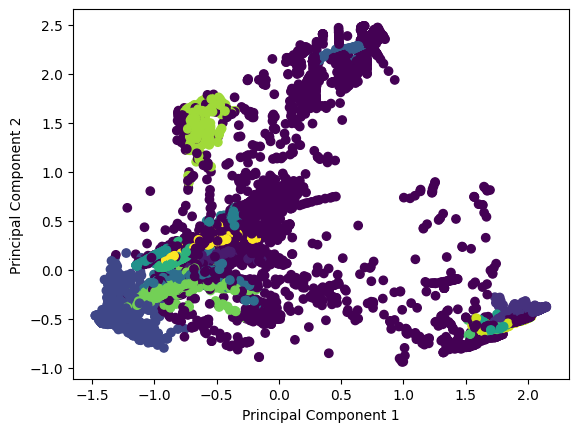

In [23]:
from sklearn.decomposition import PCA

# Giảm số chiều dữ liệu xuống còn 2
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_train)

# Trực quan hóa dữ liệu với scatter plot
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=DBS_clustering.labels_, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [24]:
# Convert target variable to binary classification
y = y_train.apply(lambda x: 'normal' if x == 4 else 'attack')

# Label the data points with cluster IDs
labels = DBS_clustering.labels_

# Create a DataFrame to store attack points


# Evaluate the clustering with crosstab
print(pd.crosstab(y, labels, rownames=['True Label'], colnames=['Cluster ID']))



Cluster ID   -1    0     1     2    3    4    5    6    7     8    9     10   
True Label                                                                    
attack      6641    0  2566   168  453  122    8  686  211     0  212     2  \
normal      2169  277     0  6906    0  625  232    0    0  1630    0  1263   

Cluster ID   11   12   13  
True Label                 
attack        0  216  458  
normal      347    0    0  


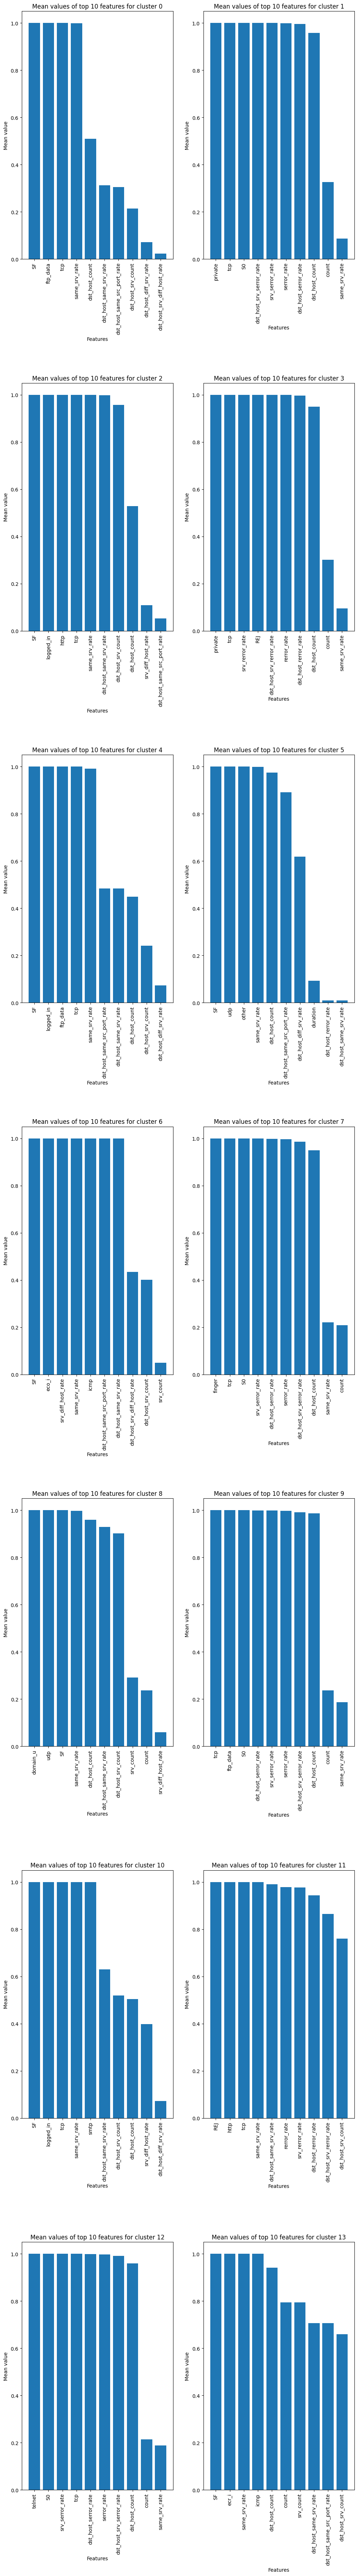

In [25]:
import math

cluster_indices = np.where(DBS_clustering.labels_ != -1)
cluster_data = X_train.iloc[cluster_indices]
cluster_labels = y_train.iloc[cluster_indices]
cluster_ids = np.unique(DBS_clustering.labels_[cluster_indices])

n_cols = 2  # Số lượng cột của grid subplot
n_rows = math.ceil(len(cluster_ids) / n_cols)  # Số lượng dòng của grid subplot

fig, axes = plt.subplots(n_rows, n_cols, figsize=(150, 250))  # Kích thước của grid subplot
axes = axes.flatten()  # Chuyển grid subplot thành một mảng 1 chiều để dễ truy cập

for i, cluster_id in enumerate(cluster_ids):
    # Lọc dữ liệu thuộc cụm hiện tại
    indices = np.where(DBS_clustering.labels_ == cluster_id)
    data = X_train.iloc[indices]
    labels = y_train.iloc[indices]

    # Tính số lượng mẫu và số lượng đặc trưng
    n_samples, n_features = data.shape

    # Tính mean và std cho từng đặc trưng
    feature_means = np.mean(data, axis=0)
    feature_stds = np.std(data, axis=0)

    # Sắp xếp các đặc trưng theo thứ tự giảm dần
    feature_order = np.argsort(feature_means)[::-1]

    # Vẽ biểu đồ cho cụm hiện tại
    ax = axes[i]  # Truy cập subplot tương ứng
    ax.bar(range(10), feature_means[feature_order][:10])
    ax.set_xticks(range(10))
    ax.set_xticklabels(X_train.columns[feature_order][:10], rotation=90)
    ax.set_xlabel('Features')
    ax.set_ylabel('Mean value')
    ax.set_title(f'Mean values of top 10 features for cluster {cluster_id}')
    fig.set_size_inches(12, 90)
    fig.subplots_adjust(hspace=0.5, wspace=0.2)
plt.show()


In [132]:
#X_train_features = X_train.loc[:, ["dst_host_srv_rerror_rate","serror_rate","srv_serror_rate","dst_host_serror_rate","rerror_rate","dst_host_count","duration","dst_host_same_src_port_rate","dst_host_same_srv_rate","same_srv_rate","S0", "REJ", "eco_i", "SF","icmp"]]

In [41]:
# Nối X_train và y_train lại với nhau thành một DataFrame
df_train = pd.concat([X_train, y_train], axis=1)

In [42]:
# Phân 4 loại tấn công của bộ train vào dataframe
# Tạo 4 dataframe mới
DoS_df = pd.DataFrame()
Probe_df = pd.DataFrame()
R2L_df = pd.DataFrame()
U2R_df = pd.DataFrame()
normal_df = pd.DataFrame()

# Nhóm các mẫu theo nhãn và lưu vào các dataframe tương ứng
for label, group in df_train.groupby('intrusion'):
    if label == 0:
        DoS_df = pd.concat([DoS_df, group], axis=0)
    elif label == 1 :
        Probe_df = pd.concat([Probe_df, group], axis=0)
    elif label == 2 :
        R2L_df = pd.concat([R2L_df, group], axis=0)
    elif label == 3 :
        U2R_df = pd.concat([U2R_df, group], axis=0)
    elif label == 4:
        normal_df = pd.concat([normal_df, group], axis=0)

DoS_df = pd.concat([DoS_df, normal_df], axis=0)
Probe_df = pd.concat([Probe_df, normal_df], axis=0)
R2L_df = pd.concat([R2L_df, normal_df], axis=0)
U2R_df = pd.concat([U2R_df, normal_df], axis=0)

In [43]:
YDoS_train = DoS_df['intrusion']
XDoS_train = DoS_df.drop(labels= ['intrusion'], axis=1)

In [44]:
from sklearn.preprocessing import LabelBinarizer
YDoS_train = LabelBinarizer().fit_transform(YDoS_train)

XDoS_train=np.array(XDoS_train)
YDoS_train=np.array(YDoS_train)
XDoS_train, XDoS_test, YDoS_train, YDoS_test = train_test_split(XDoS_train, YDoS_train, test_size=0.2, random_state=42)

In [45]:
# reshape input to be [samples, time steps, features]
XDoS_train = np.reshape(XDoS_train, ( XDoS_train.shape[0], XDoS_train.shape[1],1 ))
XDoS_test = np.reshape(XDoS_test, ( XDoS_test.shape[0],  XDoS_test.shape[1],1 ))

In [46]:
# create CNN model
model1 = Sequential()

# add convolutional layer with 32 filters, kernel size of 3x3 and activation function ReLU
model1.add(Conv1D(32, kernel_size=3,activation='relu', input_shape=( XDoS_train.shape[1],XDoS_train.shape[2])))

# add max pooling layer
model1.add(MaxPool1D(pool_size=3))

# add flatten layer to convert output of convolutional layer to 1D array
model1.add(Flatten())


# add dense layer with 128 neurons and activation function ReLU
model1.add(Dense(128, activation='relu'))

# add dropout layer with rate of 0.2 to prevent overfitting
model1.add(Dropout(0.2))

# add output layer with 1 neuron and sigmoid activation function for binary classification
model1.add(Dense(1, activation='sigmoid'))

# compile model with binary crossentropy loss function and Adam optimizer
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# print model summary
model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 120, 32)           128       
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 40, 32)           0         
 1D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1280)              0         
                                                                 
 dense_4 (Dense)             (None, 128)               163968    
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                      

In [47]:
history1 = model1.fit(XDoS_train, YDoS_train, batch_size=1024, epochs=50, validation_data=(XDoS_test, YDoS_test))

2023-05-08 20:07:43.412505: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 44220608 exceeds 10% of free system memory.


Epoch 1/50
89/89 [==============================] - 23s 53ms/step - loss: 0.1273 - accuracy: 0.9752 - val_loss: 0.0627 - val_accuracy: 0.9868
Epoch 2/50
89/89 [==============================] - 5s 58ms/step - loss: 0.0522 - accuracy: 0.9891 - val_loss: 0.0501 - val_accuracy: 0.9882
Epoch 3/50
89/89 [==============================] - 5s 57ms/step - loss: 0.0432 - accuracy: 0.9893 - val_loss: 0.0424 - val_accuracy: 0.9879
Epoch 4/50
89/89 [==============================] - 5s 53ms/step - loss: 0.0359 - accuracy: 0.9892 - val_loss: 0.0348 - val_accuracy: 0.9883
Epoch 5/50
89/89 [==============================] - 4s 50ms/step - loss: 0.0304 - accuracy: 0.9897 - val_loss: 0.0297 - val_accuracy: 0.9892
Epoch 6/50
89/89 [==============================] - 4s 50ms/step - loss: 0.0258 - accuracy: 0.9907 - val_loss: 0.0260 - val_accuracy: 0.9894
Epoch 7/50
89/89 [==============================] - 5s 60ms/step - loss: 0.0229 - accuracy: 0.9919 - val_loss: 0.0219 - val_accuracy: 0.9910
Epoch 8/50
8

In [48]:
# predicting target attribute on testing dataset
test_results = model1.evaluate(XDoS_test, YDoS_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')

708/708 [==============================] - 2s 2ms/step - loss: 0.0024 - accuracy: 0.9992
Test results - Loss: 0.0023549613542854786 - Accuracy: 99.92054104804993%


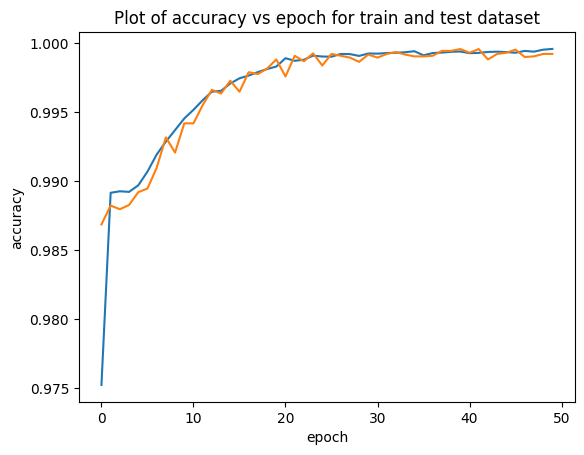

In [51]:
# Plot of accuracy vs epoch for train and test dataset
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title("Plot of accuracy vs epoch for train and test dataset")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

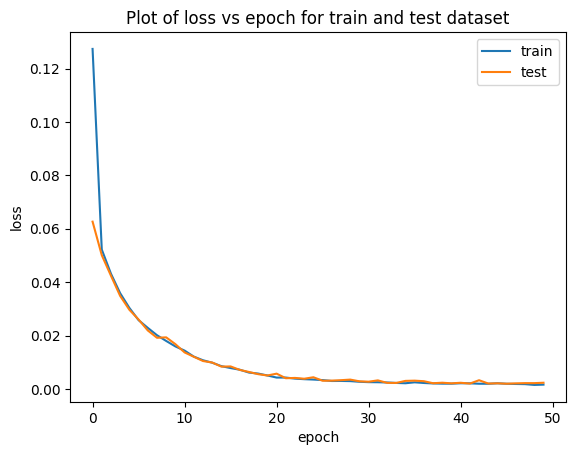

In [52]:
# Plot of loss vs epoch for train and test dataset
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title("Plot of loss vs epoch for train and test dataset")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

# Probe

In [40]:
from sklearn.preprocessing import LabelBinarizer
YProbe_train = Probe_df['intrusion']
XProbe_train = Probe_df.drop(labels= ['intrusion'], axis=1)

XProbe_train=np.array(XProbe_train)
YProbe_train=np.array(YProbe_train)

XProbe_train, XProbe_test, YProbe_train, YProbe_test = train_test_split(XProbe_train, YProbe_train, test_size=0.1, random_state=42)

# reshape input to be [samples, time steps, features]
XProbe_train = np.reshape(XProbe_train, ( XProbe_train.shape[0], XProbe_train.shape[1],1 ))
XProbe_test = np.reshape(XProbe_test, ( XProbe_test.shape[0],  XProbe_test.shape[1],1 ))

In [41]:
model2 = Sequential() # initializing model
# input layer and first layer with 50 neurons
model2.add(Conv1D(32, 3, padding="same",input_shape = (XProbe_train.shape[1], XProbe_train.shape[2]), activation='relu'))
model2.add(MaxPool1D(pool_size=(4)))  
model2.add(Dropout(0.2))
model2.add(Conv1D(32, 3, padding="same", activation='relu'))
model2.add(MaxPool1D(pool_size=(4)))  
model2.add(Dropout(0.2))
model2.add(Flatten())
model2.add(Dense(units=50))
# output layer with softmax activation
model2.add(Dense(units=1,activation='softmax'))
# defining loss function, optimizer, metrics and then compiling model
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# summary of model layers
model2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 94, 32)            128       
                                                                 
 max_pooling1d_6 (MaxPooling  (None, 23, 32)           0         
 1D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 23, 32)            0         
                                                                 
 conv1d_7 (Conv1D)           (None, 23, 32)            3104      
                                                                 
 max_pooling1d_7 (MaxPooling  (None, 5, 32)            0         
 1D)                                                             
                                                                 
 dropout_7 (Dropout)         (None, 5, 32)            

In [42]:
history = model2.fit(XProbe_train, YProbe_train, batch_size=1024, epochs=50, validation_split=0.2)

Epoch 1/50


/home/tranosa/.local/lib/python3.10/site-packages/tensorflow/python/util/dispatch.py:1176: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


56/56 [==============================] - 4s 54ms/step - loss: 0.0000e+00 - accuracy: 0.1466 - val_loss: 0.0000e+00 - val_accuracy: 0.1548
Epoch 2/50
56/56 [==============================] - 3s 51ms/step - loss: 0.0000e+00 - accuracy: 0.1466 - val_loss: 0.0000e+00 - val_accuracy: 0.1548
Epoch 3/50
56/56 [==============================] - 3s 52ms/step - loss: 0.0000e+00 - accuracy: 0.1466 - val_loss: 0.0000e+00 - val_accuracy: 0.1548
Epoch 4/50
56/56 [==============================] - 3s 56ms/step - loss: 0.0000e+00 - accuracy: 0.1466 - val_loss: 0.0000e+00 - val_accuracy: 0.1548
Epoch 5/50
56/56 [==============================] - 3s 54ms/step - loss: 0.0000e+00 - accuracy: 0.1466 - val_loss: 0.0000e+00 - val_accuracy: 0.1548
Epoch 6/50
56/56 [==============================] - 4s 66ms/step - loss: 0.0000e+00 - accuracy: 0.1466 - val_loss: 0.0000e+00 - val_accuracy: 0.1548
Epoch 7/50
56/56 [==============================] - 4s 63ms/step - loss: 0.0000e+00 - accuracy: 0.1466 - val_loss: 0.

KeyboardInterrupt: 

# R2L

In [43]:
from sklearn.preprocessing import LabelBinarizer
YR2L_train = R2L_df['intrusion']
XR2L_train = R2L_df.drop(labels= ['intrusion'], axis=1)

XR2L_train=np.array(XR2L_train)
YR2L_train=np.array(YR2L_train)

XR2L_train, XR2L_test, YR2L_train, YR2L_test = train_test_split(XR2L_train, YR2L_train, test_size=0.2, random_state=42)

# reshape input to be [samples, time steps, features]
XR2L_train = np.reshape(XR2L_train, ( XR2L_train.shape[0], XR2L_train.shape[1],1 ))
XR2L_test = np.reshape(XR2L_test, ( XR2L_test.shape[0],  XR2L_test.shape[1],1 ))

In [44]:
# create CNN model
model3 = Sequential()

# add convolutional layer with 32 filters, kernel size of 3x3 and activation function ReLU
model3.add(Conv1D(32, kernel_size=3,activation='relu', input_shape=( XR2L_train.shape[1],XR2L_train.shape[2])))

# add max pooling layer
model3.add(MaxPool1D(pool_size=3))

# add flatten layer to convert output of convolutional layer to 1D array
model3.add(Flatten())


# add dense layer with 128 neurons and activation function ReLU
model3.add(Dense(128, activation='relu'))

# add dropout layer with rate of 0.2 to prevent overfitting
model3.add(Dropout(0.2))

# add output layer with 1 neuron and sigmoid activation function for binary classification
model3.add(Dense(1, activation='sigmoid'))

# compile model with binary crossentropy loss function and Adam optimizer
model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# print model summary
model3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_8 (Conv1D)           (None, 92, 32)            128       
                                                                 
 max_pooling1d_8 (MaxPooling  (None, 30, 32)           0         
 1D)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 960)               0         
                                                                 
 dense_10 (Dense)            (None, 128)               123008    
                                                                 
 dropout_8 (Dropout)         (None, 128)               0         
                                                                 
 dense_11 (Dense)            (None, 1)                 129       
                                                      

In [45]:
history = model3.fit(XR2L_train, YR2L_train, batch_size=1024, epochs=50, validation_data=(XR2L_test, YR2L_test))

Epoch 1/50
54/54 [==============================] - 3s 41ms/step - loss: -37.0884 - accuracy: 0.0000e+00 - val_loss: -140.9324 - val_accuracy: 0.0000e+00
Epoch 2/50
54/54 [==============================] - 2s 46ms/step - loss: -519.8939 - accuracy: 0.0000e+00 - val_loss: -1183.7886 - val_accuracy: 0.0000e+00
Epoch 3/50
54/54 [==============================] - 2s 43ms/step - loss: -2534.8982 - accuracy: 0.0000e+00 - val_loss: -4490.1650 - val_accuracy: 0.0000e+00
Epoch 4/50
54/54 [==============================] - 2s 42ms/step - loss: -7556.7656 - accuracy: 0.0000e+00 - val_loss: -11594.8584 - val_accuracy: 0.0000e+00
Epoch 5/50
54/54 [==============================] - 2s 39ms/step - loss: -17103.6680 - accuracy: 0.0000e+00 - val_loss: -23994.9121 - val_accuracy: 0.0000e+00
Epoch 6/50
54/54 [==============================] - 2s 38ms/step - loss: -32643.5664 - accuracy: 0.0000e+00 - val_loss: -43117.8164 - val_accuracy: 0.0000e+00
Epoch 7/50
54/54 [==============================] - 2s 41

KeyboardInterrupt: 

# U2R

In [431]:
from sklearn.preprocessing import LabelBinarizer
YU2R_train = U2R_df['intrusion']
XU2R_train = U2R_df.drop(labels= ['intrusion'], axis=1)

XU2R_train=np.array(XU2R_train)
YU2R_train=np.array(YU2R_train)

XU2R_train, XU2R_test, YU2R_train, YU2R_test = train_test_split(XU2R_train, YU2R_train, test_size=0.08, random_state=42)

# reshape input to be [samples, time steps, features]
XU2R_train = np.reshape(XU2R_train, ( XU2R_train.shape[0], XU2R_train.shape[1],1 ))
XU2R_test = np.reshape(XU2R_test, ( XU2R_test.shape[0],  XU2R_test.shape[1],1 ))

In [432]:
# create CNN model
model4 = Sequential()

# add convolutional layer with 32 filters, kernel size of 3x3 and activation function ReLU
model4.add(Conv1D(32, kernel_size=3,activation='relu', input_shape=( XU2R_train.shape[1],XU2R_train.shape[2])))

# add max pooling layer
model4.add(MaxPool1D(pool_size=3))

# add flatten layer to convert output of convolutional layer to 1D array
model4.add(Flatten())


# add dense layer with 128 neurons and activation function ReLU
model4.add(Dense(128, activation='relu'))

# add dropout layer with rate of 0.2 to prevent overfitting
model4.add(Dropout(0.2))

# add output layer with 1 neuron and sigmoid activation function for binary classification
model4.add(Dense(1, activation='sigmoid'))

# compile model with binary crossentropy loss function and Adam optimizer
model4.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# print model summary
model4.summary()

Model: "sequential_47"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_63 (Conv1D)          (None, 19, 32)            128       
                                                                 
 max_pooling1d_61 (MaxPoolin  (None, 6, 32)            0         
 g1D)                                                            
                                                                 
 flatten_42 (Flatten)        (None, 192)               0         
                                                                 
 dense_84 (Dense)            (None, 128)               24704     
                                                                 
 dropout_51 (Dropout)        (None, 128)               0         
                                                                 
 dense_85 (Dense)            (None, 1)                 129       
                                                     

In [433]:
history = model4.fit(XU2R_train, YU2R_train, batch_size=2000, epochs=50, validation_data=(XU2R_test, YU2R_test))

Epoch 1/50
32/32 [==============================] - 1s 25ms/step - loss: -6.6505 - accuracy: 0.0000e+00 - val_loss: -19.5999 - val_accuracy: 0.0000e+00
Epoch 2/50
32/32 [==============================] - 1s 20ms/step - loss: -47.1859 - accuracy: 0.0000e+00 - val_loss: -94.3831 - val_accuracy: 0.0000e+00
Epoch 3/50
32/32 [==============================] - 1s 19ms/step - loss: -175.3835 - accuracy: 0.0000e+00 - val_loss: -299.0169 - val_accuracy: 0.0000e+00
Epoch 4/50
32/32 [==============================] - 1s 19ms/step - loss: -476.1758 - accuracy: 0.0000e+00 - val_loss: -727.9395 - val_accuracy: 0.0000e+00
Epoch 5/50
32/32 [==============================] - 1s 19ms/step - loss: -1053.3467 - accuracy: 0.0000e+00 - val_loss: -1492.7782 - val_accuracy: 0.0000e+00
Epoch 6/50
32/32 [==============================] - 1s 20ms/step - loss: -2015.9412 - accuracy: 0.0000e+00 - val_loss: -2698.0442 - val_accuracy: 0.0000e+00
Epoch 7/50
32/32 [==============================] - 1s 19ms/step - loss

In [373]:
XDoS_train.shape

(20641, 21, 1)

In [259]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

In [260]:
attack_types = np.unique(y_train)
labels = DBS_clustering.labels_
for attack_type in attack_types:
    print(f"Metrics for {attack_type} attacks:")
    y_true = (y_train == attack_type)
    y_pred2 = (labels == -1) | (y_train == attack_type) # anomaly or same attack type
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred2).ravel()
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1_score = 2 * (precision * recall) / (precision + recall)
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1_score:.4f}\n")
    print("=================================\n")

Metrics for 0 attacks:
Accuracy: 0.9459
Precision: 0.8714
Recall: 1.0000
F1-score: 0.9313


Metrics for 1 attacks:
Accuracy: 0.8686
Precision: 0.4088
Recall: 1.0000
F1-score: 0.5804


Metrics for 2 attacks:
Accuracy: 0.8536
Precision: 0.0536
Recall: 1.0000
F1-score: 0.1018


Metrics for 3 attacks:
Accuracy: 0.8528
Precision: 0.0030
Recall: 1.0000
F1-score: 0.0059


Metrics for 4 attacks:
Accuracy: 0.8889
Precision: 0.8278
Recall: 1.0000
F1-score: 0.9058


